In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

## Data given to YR

In [2]:
data_path = '/gpfs01/euler/data/Data/Behrens_Hoefling/export/yr/'
train_inputDict = np.load(data_path+'train_inputs.pkl',allow_pickle=True)

In [3]:
datamean, datasd = 36.98, 36.98

In [4]:
s_ids = list(train_inputDict.keys())

In [5]:
len(s_ids)

11

#### Test if ALL 11 value (np.arrays) in this dictionary are the SAME

In [6]:
# load all 11 sessions input in to a numpy array
toTest = np.zeros((11,16200,2,72,64))
for i,s_id in enumerate(s_ids):
    toTest[i] = np.transpose((np.around(train_inputDict[s_id].cpu().detach().numpy()*datasd+datamean)).astype(int), (1,0,2,3))

In [7]:
# test if the adjacent array (16200,2,72,64) is the same 
for i in range(len(s_ids)-1):
    print(np.sum(toTest[i]==toTest[i+1]))

149299200
149299200
149299200
149299200
149299200
149299200
149299200
149299200
149299200
149299200


In [8]:
# so, yes, all 11 sessions in this dictionary have the exact same value
149299200/16200/2/72/64

1.0

## Lara's data

#### 1. test if the random sequence files are same for left and right eyes (SHOUD BE YES)

In [9]:
lara_rand_left = np.load('/gpfs01/euler/data/Data/Behrens_Hoefling/Stimuli/MouseCamCorrected/left/RandomSequences.npy')
lara_rand_right = np.load('/gpfs01/euler/data/Data/Behrens_Hoefling/Stimuli/MouseCamCorrected/right/RandomSequences.npy')

In [10]:
np.sum(lara_rand_seq1 == lara_rand_seq2)/20 # 108->correct

108.0

In [11]:
del lara_rand_seq1
del lara_rand_seq2

#### 2. test if the train_input files are same for left and right eyes (SHOULD BE NO)

In [12]:
lara_train_input_left = np.load('/gpfs01/euler/data/Data/Behrens_Hoefling/Stimuli/MouseCamCorrected/left/train_72x64.npy')
lara_train_input_right = np.load('/gpfs01/euler/data/Data/Behrens_Hoefling/Stimuli/MouseCamCorrected/right/train_72x64.npy')

In [13]:
np.sum(lara_train_input_left==lara_train_input_right)/2/16200/720/64 # 1.0 -> correct

0.007855168681412894

#### 2.b test if flip one along y-axis/vertically will generate a matching numpy.array

Text(0.5, 1.0, 'original_right')

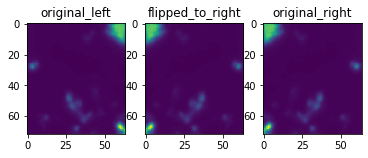

In [14]:
# test on one frame
test_img = lara_train_input_left[0,0,:,:]
test_flip = np.flip(test_img, axis=1)
res = lara_train_input_right[0,0,:,:]

plt.subplot(131)
plt.imshow(test_img)
plt.title('original_left')
plt.subplot(132)
plt.imshow(test_flip)
plt.title('flipped_to_right')
plt.subplot(133)
plt.imshow(res)
plt.title('original_right')

In [15]:
# test on all input
test_flip = np.flip(lara_train_input_left, axis=3) # (2,16200,72,64)

In [16]:
np.sum(test_flip==lara_train_input_right)/2/16200/72/64 # 1.0 -> correct

1.0

#### After checking lara's data's integrity, use her data as the "ground truth" to answer:

### two Questions 
#### 1.which sequence is the one used in PLOS paper(used by all 11 sessions above)?
#### 2. left or right version?

In [17]:
yr_input = toTest[i];del toTest

##### Assume it's the left eye version...

In [18]:
lara_input = lara_train_input_left.transpose((1,0,2,3))

In [19]:
yr_input.shape,lara_input.shape

((16200, 2, 72, 64), (16200, 2, 72, 64))

In [20]:
seq = np.load('/gpfs01/euler/data/Data/Behrens_Hoefling/Stimuli/MouseCamCorrected/left/RandomSequences.npy')

In [21]:
# use lara's left eye input + randomseq -> 
# 20 different versions of train input -> 
# see which matches with yr's

In [27]:
seq

array([ 60, 218, 122, 178,  30,  76, 234,  30, 136, 102, 216,  66, 152,
        60, 162,   0,  52, 180, 104, 238], dtype=uint8)

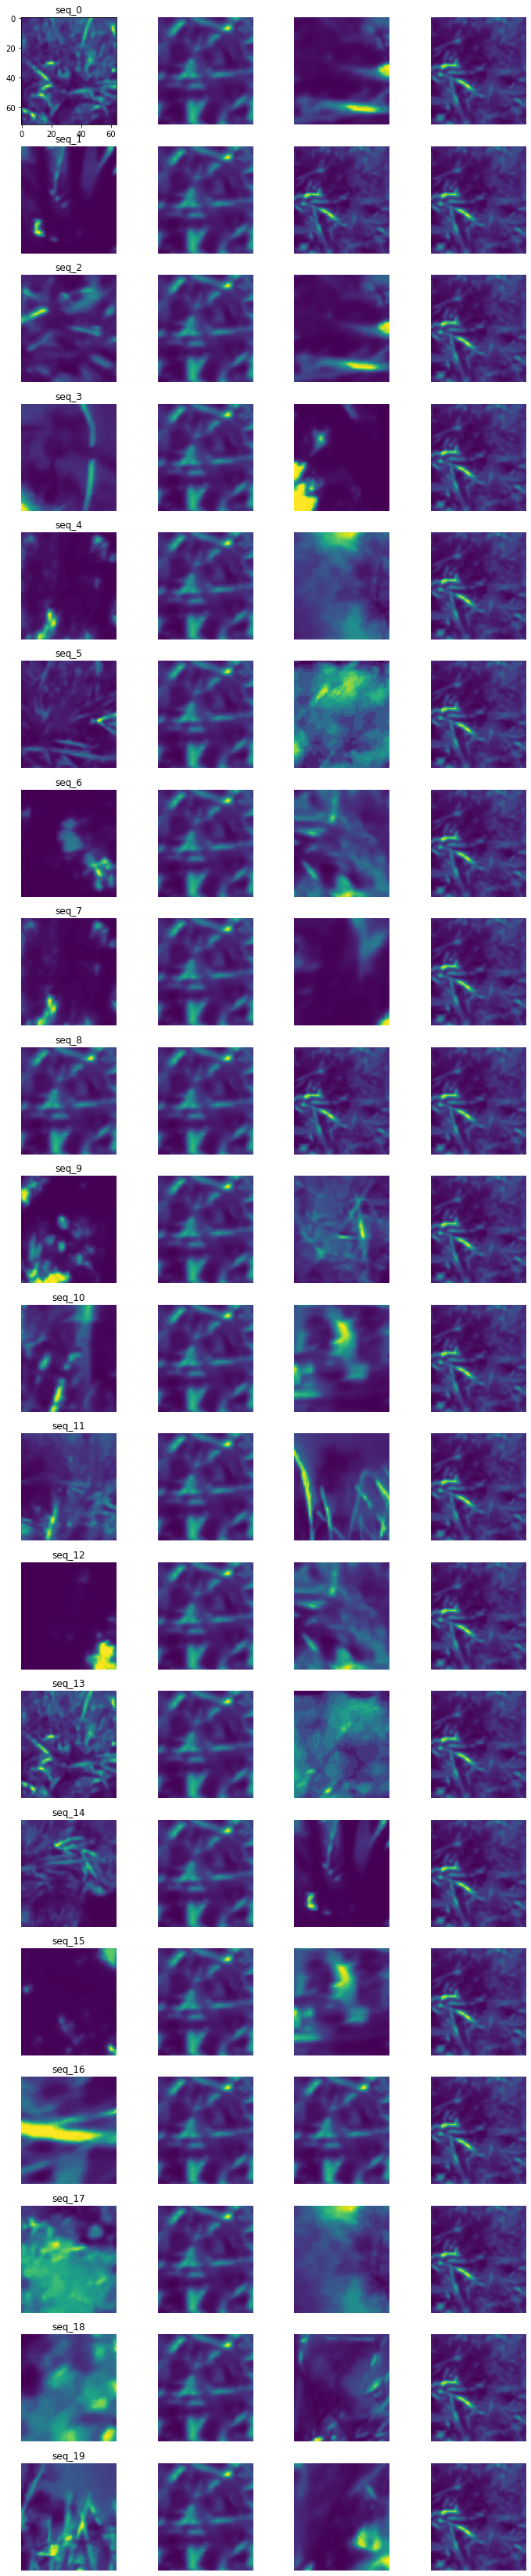

In [29]:
fig,ax = plt.subplots(20,4,figsize = (12,60),facecolor='white')
for i in range(20):
    tmp_seq = seq[:,i]
    toPlot1 = lara_input[tmp_seq[0]*150,0] # left-eye, 1st frame, green ch
    toPlot2 = lara_input[tmp_seq[1]*150,0] # left-eye, 151th frame, green ch
    yr1 = yr_input[0,0] # yr, 1st frame, ? ch?
    yr2 = yr_input[150,0] # yr, 151th frame, ? ch?
    # toPlot1 = np.uint8(np.around((cv2.resize(toPlot1/255.0, None, fx=scale, fy=scale, interpolation=cv2.INTER_AREA))*255.0))
    # toPlot2 = np.uint8(np.around((cv2.resize(toPlot2/255.0, None, fx=scale, fy=scale, interpolation=cv2.INTER_AREA))*255.0))
    # ax[i,0].imshow(lara_train_input[seq[0]*150,0])
    # ax[i,1].imshow(lara_train_input[seq[1]*150,0])
    ax[i,0].imshow(toPlot1)
    ax[i,1].imshow(yr1)# ax[i,1].imshow(reversed_input[0,0])
    ax[i,2].imshow(toPlot2)
    ax[i,3].imshow(yr2)# ax[i,3].imshow(reversed_input[150,0])
    ax[i,0].set_title('seq_'+str(i))
ax = ax.flatten()
for each in ax[1:]:
    each.axis('off')

#### Looks like it's lara's seq_08 + left
#### let's be sure

In [30]:
seq8 = seq[:,8]

In [31]:
seq8

array([ 76,  72,  10,  44,  64,  37,  23,  38,  53,  58,  86,  73,  19,
        89,  34,  69,   0, 100,  21,  56,  75,  83,  67,  30,  51,  15,
        54,  26,   2,  46,   3,  96,   4, 101,  71,  42,  52,  55,  99,
       104,  66,  14, 105,  63,  78,  94,  41,  12,  28,  61, 103,  27,
        32,  88, 102,  24,  90,  79,  84,  74,  59,  25,   9,  31,   1,
        95,  43,  29,  13,  92, 107,  62,  82,  85,  60,  49,  17,  11,
        22,  20,  18,  16,  57,  36,  87,  65,  80,   5,  70,  33,  47,
        93,   6,  97,  39,   8,  98,   7,  68,  81,  45,  77, 106,  50,
        48,  35,  91,  40], dtype=uint8)

In [32]:
lara_train_input_left_seq8 = np.zeros((2, 16200, 72, 64))

In [33]:
lara_train_input_left.shape

(2, 16200, 72, 64)

In [34]:
for i,snipptNr in enumerate(seq8):
    lara_train_input_left_seq8[:,i*150:i*150+150,:,:] = lara_train_input_left[:,seq8[i]*150:seq8[i]*150+150,:,:]
    # lara_train_input_left_seq8[:,i*150

In [35]:
yr_input.shape

(16200, 2, 72, 64)

In [36]:
yr_input = yr_input.transpose((1,0,2,3))

In [37]:
np.sum(lara_train_input_left_seq8==yr_input)/16200/2/72/64

1.0

#### In conclusion:
##### '/gpfs01/euler/data/Data/Behrens_Hoefling/export/yr/train_inputs.pkl' contains left_eye_seq08 input